In [108]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
from information import *
from variance import *
from plotting import *
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import glob

## Produce equivalent figures to [Krumhardt et al. (2020)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020GB006531)

In [110]:
variable = 'intpp'
frequency = 'monthly'
metric = 'acc'
comparison = 'm2m'
startmonth = 1
ds = calc_skill(variable,frequency,startmonth,metric,comparison)
grid = xr.open_dataset(ppeDict['griddirtmp']+ppeDict['gridfile'])

/work/gam/projects/esm4_ppe/data/processed/skill/acc.m2m/ocean_cobalt_omip_2d.01.zarr/intpp already saved.


TypeError: Dimensions of C (720, 576) should be one smaller than X(720) and Y(576) while using shading='flat' see help(pcolormesh)

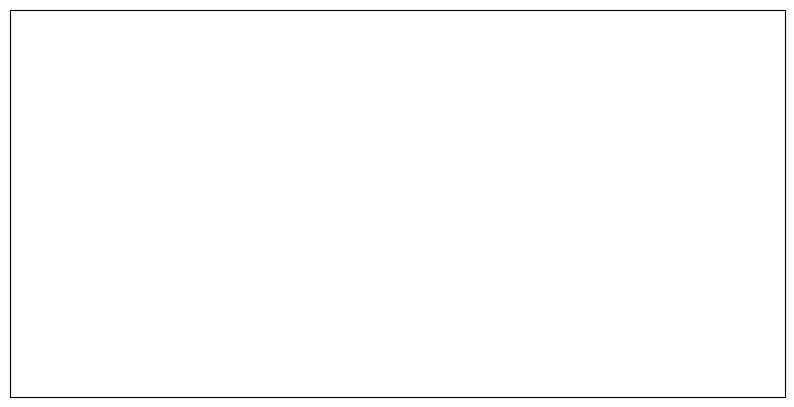

In [111]:
lead = 1
cname='Anomaly Correlation Coefficient'
crsP = ccrs.PlateCarree(central_longitude=-150)
da = ds[variable].sel(lead=lead)
danow = da.sel(skill='initialized')
fig,ax,im,cbar = draw_globalmap(danow,grid,crsP=crsP,cname=cname)
im.set_clim([-1,1])
im.set_cmap(mpl.colormaps['RdBu_r'].resampled(20))
cbar.set_ticks(np.arange(-1,1.2,0.2))
save_fig(fig,
         metric,
         variable,
         '-'.join([frequency,str(startmonth).zfill(2),comparison,'lead_'+str(lead).zfill(2)]),
         addnames=['krumhardt'])

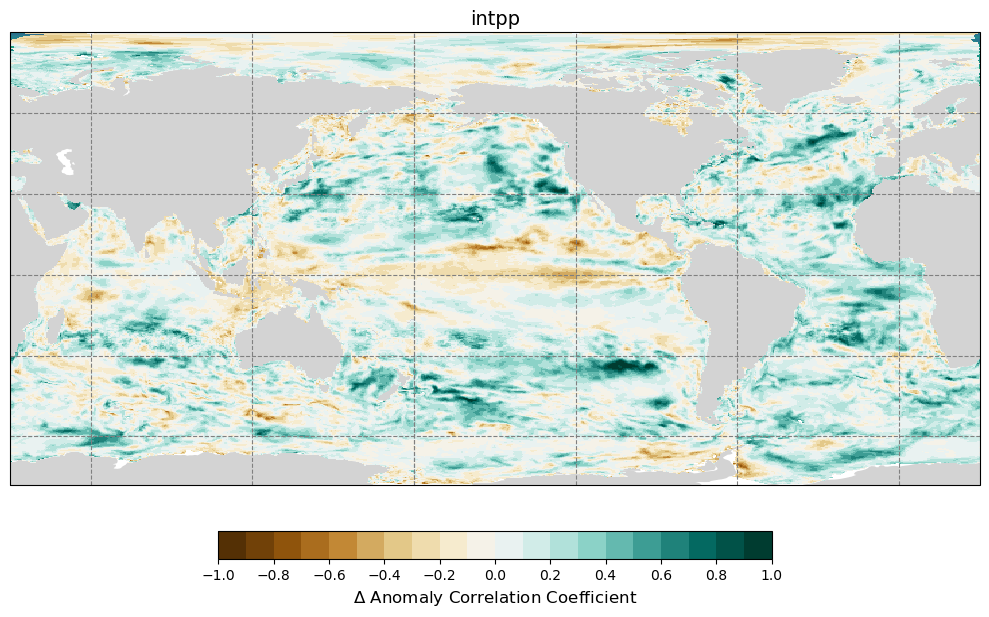

In [81]:
cname='$\Delta$ Anomaly Correlation Coefficient'
crsP = ccrs.PlateCarree(central_longitude=-150)
da = ds[variable].sel(lead=lead)
danow = da.sel(skill='initialized')-da.sel(skill='persistence')
fig,ax,im,cbar = draw_globalmap(danow,grid,crsP=crsP,cname=cname)
im.set_clim([-1,1])
im.set_cmap(mpl.colormaps['BrBG'].resampled(20))
cbar.set_ticks(np.arange(-1,1.2,0.2))
save_fig(fig,
         metric,
         variable,
         '-'.join(['persistence',frequency,str(startmonth).zfill(2),comparison,'lead_'+str(lead).zfill(2)]),
         addnames=['krumhardt'])

### PPP evolution in LMEs (Figure 6)

### Monthly

In [101]:
metric = 'ppp'
comparison = 'e2c'
mc = '.'.join([metric,comparison])
savedir = ppeDict['datasavedir']+'/processed/skill_regionalmeans/'+mc+'/'
frequency = 'monthly'
startmonth = 10
maskset = 'LME'
filename = '.'.join(['*',frequency,str(startmonth).zfill(2),maskset,'nc'])
ds = xr.open_mfdataset(savedir+filename).sel(region = LMEorderK20).transpose()

In [102]:
variable = 'intpp'
da = ds[variable]
if metric == 'ppp':
    mask = (da<ppp_threshold)
    cname = 'Potential Prognostic Predictability'
    hatch = '///'
elif metric == 'acc':
    mask = (da.sel(skill='initialized')<da.sel(skill='persistence'))
    cname = 'Anomaly Correlation Coefficient'
    hatch = '..'
    da = da.sel(skill='initialized')
ma = np.ma.masked_where(mask,da)

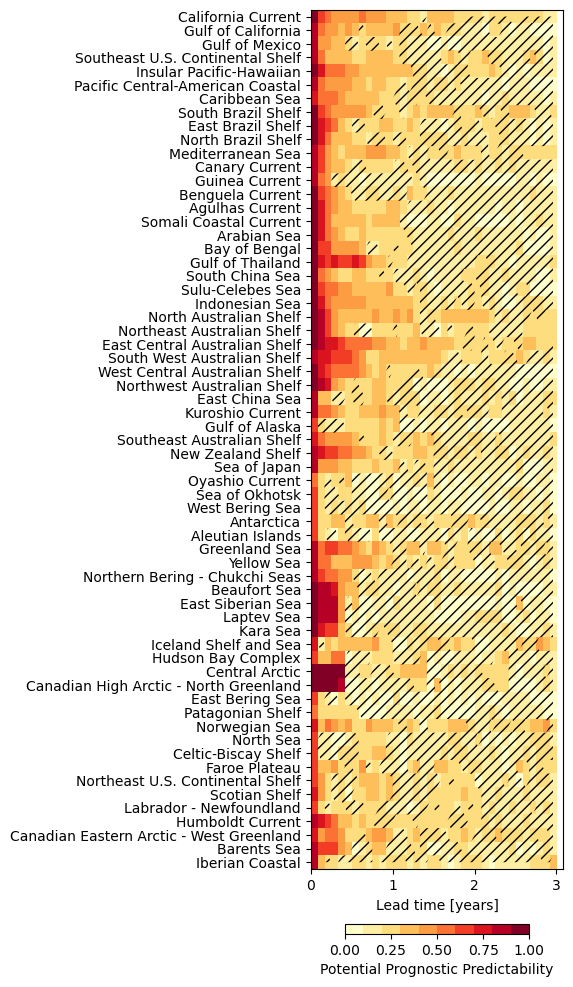

In [103]:
fig,ax = plt.subplots(figsize=(12,12))
im = ax.imshow(da,interpolation='none',aspect=2)
ax.contourf(mask, 1, hatches=['', hatch], alpha=0)
im.set_clim([0,1])
im.set_cmap(mpl.colormaps['YlOrRd'].resampled(10))

ax.set_xlim([-0.5,36.5])
ax.set_xlabel('Lead time [years]')
ax.set_xticks(np.arange(-0.5,37,12))
ax.set_xticklabels(np.arange(4))
ax.set_yticks(np.arange(len(ds['region'])))
ax.set_yticklabels(ds['region'].values)

cb = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.01,pad=0.06)
cb.set_label(cname)

save_fig(fig,
         metric,
         variable,
         '-'.join([frequency,str(startmonth).zfill(2),maskset]),
         addnames=['krumhardt'])

### Annual

In [92]:
metric = 'acc'
comparison = 'm2e'
mc = '.'.join([metric,comparison])
savedir = ppeDict['datasavedir']+'/processed/skill_regionalmeans/'+mc+'/'
frequency = 'annual'
startmonth = 1
maskset = 'LME'
filename = '.'.join(['*',frequency,str(startmonth).zfill(2),maskset,'nc'])
ds = xr.open_mfdataset(savedir+filename).sel(region = LMEorderK20).transpose()

In [93]:
variable = 'intpp'
da = ds[variable]
if metric == 'ppp':
    mask = (da<ppp_threshold)
    cname = 'Potential Prognostic Predictability'
    hatch = '///'
elif metric == 'acc':
    mask = (da.sel(skill='initialized')<da.sel(skill='persistence'))
    cname = 'Anomaly Correlation Coefficient'
    hatch = '..'
    da = da.sel(skill='initialized')
ma = np.ma.masked_where(mask,da)

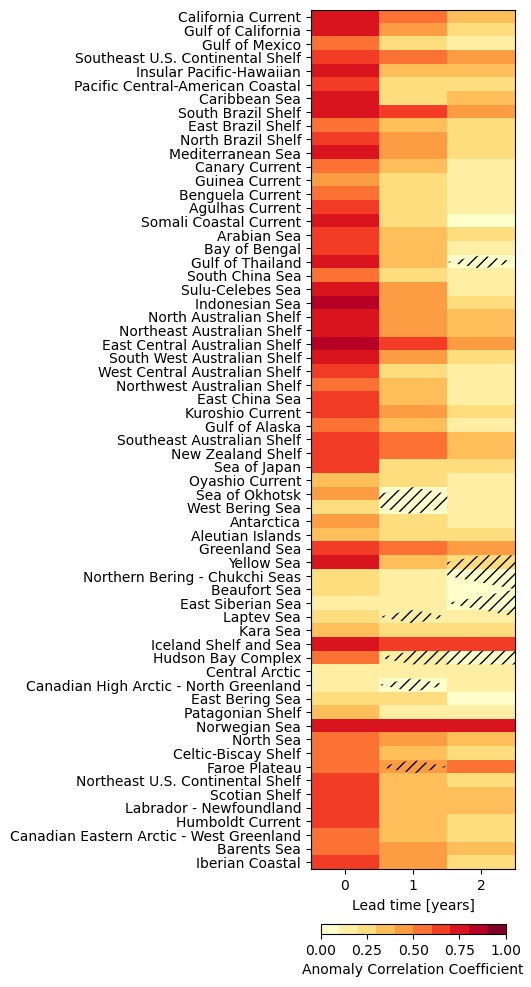

In [94]:
fig,ax = plt.subplots(figsize=(12,12))
im = ax.imshow(da,interpolation='none',aspect=0.2)
ax.contourf(mask, 1, hatches=['', '///'], alpha=0)
im.set_clim([0,1])
im.set_cmap(mpl.colormaps['YlOrRd'].resampled(10))

ax.set_xlim([-0.5,2.5])
ax.set_xlabel('Lead time [years]')
ax.set_yticks(np.arange(len(ds['region'])))
ax.set_yticklabels(ds['region'].values)

cb = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.01,pad=0.06)
cb.set_label(cname)

save_fig(fig,
         metric,
         variable,
         '-'.join([frequency,str(startmonth).zfill(2),maskset]),
         addnames=['krumhardt'])